In [34]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField
from glob import glob

In [35]:
path = "기계시설물고장예지/current/2.2kW/R-EF-05/정상"

In [36]:
af = []
filelist = sorted(glob(f'{path}/*.csv')) 
for file in filelist:
    af.append(file)
print(len(af))

65


In [37]:
list_of_df = [pd.read_csv(file,    # 파일명 설정
                 encoding='utf-8',                                      # csv 파일 인코딩 방식 설정
                 header=None,                                           # 헤더 없음 설정
                 names=['Time', 'R', 'S', 'T', 'e'],                    # 열 이름 설정
                 skiprows=9) for file in af]

In [38]:
df_list = []
for i in list_of_df:
    df = i.drop('e', axis=1)                                          
    df1 = df.set_index('Time')
    df_list.append(df1)
df_list[0]

In [39]:
"""
#######이미지 저장하기

# 이미지경로
img_path = "img_result/2.2kW_R-EF-05_벨트정상"

# 사진을 저장할 폴더 생성
if not os.path.exists(img_path):
    os.mkdir(img_path)
"""

(2000, 3)
(2000, 3, 3)


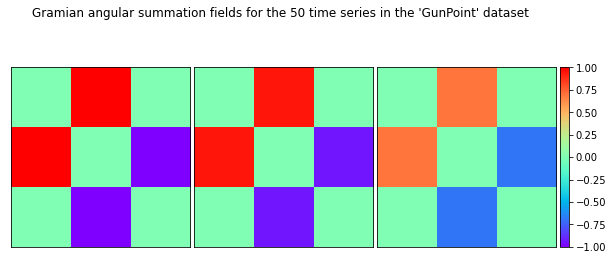

In [41]:
value = df_list[0].values
print(value.shape)
gaf = GramianAngularField(method='difference')
X_gaf = gaf.fit_transform(value)

print(X_gaf.shape)


fig = plt.figure(figsize=(10, 5))
grid = ImageGrid(fig, 111, nrows_ncols=(1,3), axes_pad=0.05, share_all=True, cbar_mode='single')
for i, ax in enumerate(grid):
    im = ax.imshow(X_gaf[i], cmap='rainbow', origin='lower', vmin=-1., vmax=1.)
grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])
plt.colorbar(im, cax=grid.cbar_axes[0])
ax.cax.toggle_label(True)

fig.suptitle("Gramian angular summation fields for the 50 time series in the "
             "'GunPoint' dataset", y=0.92)

plt.show()